## PCA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_digits


import warnings
warnings.filterwarnings('ignore')

In [2]:
digit_data = load_digits()
dir(digit_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(digit_data.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

In [4]:
print(digit_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
df=pd.DataFrame(digit_data.data,columns=digit_data.feature_names)
df['Target']=digit_data.target

In [6]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
digit_data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

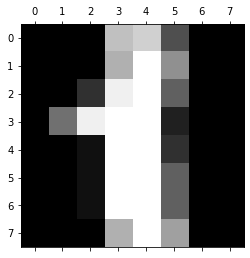

In [8]:
plt.matshow(digit_data.images[1])
plt.gray()

********* 9
********* 6


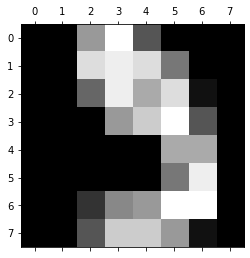

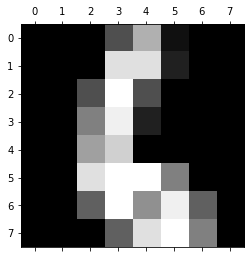

In [9]:
for i in range(105,107):
    print("*********",digit_data.target[i])
    plt.matshow(digit_data.images[i])
    plt.gray()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

## Train Test Split

In [11]:
x = df.drop('Target',axis=1)
y = df['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21,stratify=y)

In [12]:
x_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1259,0.0,7.0,16.0,16.0,16.0,16.0,11.0,0.0,0.0,8.0,...,0.0,0.0,0.0,5.0,15.0,13.0,0.0,0.0,0.0,0.0
402,0.0,0.0,2.0,11.0,13.0,4.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,2.0,10.0,16.0,7.0,0.0,0.0
786,0.0,0.0,6.0,16.0,16.0,8.0,0.0,0.0,0.0,2.0,...,3.0,0.0,0.0,0.0,8.0,16.0,15.0,8.0,0.0,0.0
488,0.0,2.0,16.0,12.0,12.0,14.0,7.0,0.0,0.0,3.0,...,0.0,0.0,0.0,3.0,12.0,15.0,7.0,0.0,0.0,0.0
1671,0.0,0.0,0.0,0.0,8.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.0,0.0,6.0,15.0,5.0,0.0,0.0,0.0,0.0,1.0,...,8.0,0.0,0.0,0.0,7.0,12.0,13.0,12.0,1.0,0.0
1599,0.0,0.0,0.0,15.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0
374,0.0,0.0,1.0,9.0,16.0,16.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,7.0,0.0,0.0,0.0
1301,0.0,0.0,0.0,2.0,14.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,16.0,6.0,0.0,0.0


## Without PCA

In [14]:
#Preprocessing
std_scaler=StandardScaler()
std_array=std_scaler.fit_transform(x_train)
x_train_std=pd.DataFrame(std_array,columns=x_train.columns)
x_train_std


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,7.276206,2.261298,0.984067,0.965525,1.810795,2.940028,-0.127477,-0.068276,1.876868,...,-0.759559,-0.220437,0.0,5.153243,1.849459,0.208456,-2.399608,-1.138706,-0.504913,-0.200347
1,0.0,-0.327401,-0.675991,-0.208822,0.267049,-0.301015,-0.405778,-0.127477,-0.068276,-0.622530,...,-0.352507,-0.220437,0.0,-0.289299,-0.692205,-0.484282,0.843813,0.049788,-0.504913,-0.200347
2,0.0,-0.327401,0.163235,0.984067,0.965525,0.402922,-0.405778,-0.127477,-0.068276,0.002319,...,-0.148981,-0.220437,0.0,-0.289299,0.480871,0.901194,0.641099,0.219573,-0.504913,-0.200347
3,0.0,1.845058,2.261298,0.029756,0.034224,1.458827,1.723371,-0.127477,-0.068276,0.314744,...,-0.759559,-0.220437,0.0,2.976226,1.262922,0.670281,-0.980611,-1.138706,-0.504913,-0.200347
4,0.0,-0.327401,-1.095603,-2.833178,-0.897078,0.754890,-0.405778,-0.127477,-0.068276,-0.622530,...,-0.759559,-0.220437,0.0,-0.289299,-1.083230,-2.793409,-1.386039,0.559143,-0.504913,-0.200347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0.0,-0.327401,0.163235,0.745489,-1.595554,-1.004952,-0.405778,-0.127477,-0.068276,-0.310105,...,0.868650,-0.220437,0.0,-0.289299,0.285358,-0.022457,0.235672,0.898713,-0.265182,-0.200347
1343,0.0,-0.327401,-1.095603,0.745489,-0.198602,-1.004952,-0.405778,-0.127477,-0.068276,-0.622530,...,-0.759559,-0.220437,0.0,-0.289299,-1.083230,0.439368,-1.588753,-1.138706,-0.504913,-0.200347
1344,0.0,-0.327401,-0.885797,-0.685978,0.965525,1.810795,0.506715,-0.127477,-0.068276,-0.622530,...,-0.759559,-0.220437,0.0,-0.289299,-1.083230,-0.022457,-0.980611,-1.138706,-0.504913,-0.200347
1345,0.0,-0.327401,-1.095603,-2.356023,0.499874,-0.828968,-0.405778,-0.127477,-0.068276,-0.622530,...,-0.759559,-0.220437,0.0,-0.289299,-0.496692,-2.331583,0.843813,-0.119996,-0.504913,-0.200347


In [16]:
#Model Train
lr_model=LogisticRegression()
lr_model.fit(x_train_std,y_train)
lr_model.score(x_train_std,y_train)

0.9985152190051967

## With PCA

In [17]:
#Preprocessing
std_scaler=StandardScaler()
std_array=std_scaler.fit_transform(x_train)
x_train_std=pd.DataFrame(std_array,columns=x_train.columns)


pca=PCA(n_components=None)
x_train_pca=pca.fit_transform(x_train_std,y_train)
pc_names=[f'PC{i}' for i in range(1,x_train_pca.shape[1]+1)]
x_train_pca=pd.DataFrame(x_train_pca,columns=pc_names)
x_train_pca

lr_model=LogisticRegression()
lr_model.fit(x_train_pca,y_train)
lr_model.score(x_train_pca,y_train)

0.9985152190051967

In [18]:
# pc_names=[f'PC{i}' for i in range(1,x_train_pca.shape[1]+1)]
# pc_names

In [23]:
#Preprocessing
std_scaler=StandardScaler()
std_array=std_scaler.fit_transform(x_train)
x_train_std=pd.DataFrame(std_array,columns=x_train.columns)


pca=PCA(n_components=None)
x_train_pca=pca.fit_transform(x_train_std,y_train)
pc_names=[f'PC{i}' for i in range(1,x_train_pca.shape[1]+1)]
x_train_pca=pd.DataFrame(x_train_pca,columns=pc_names)
x_train_pca

lr_model=LogisticRegression()
lr_model.fit(x_train_pca,y_train)
lr_model.score(x_train_pca,y_train)

0.9985152190051967

In [24]:
#Preprocessing
std_scaler=StandardScaler()
std_array=std_scaler.fit_transform(x_train)
x_train_std=pd.DataFrame(std_array,columns=x_train.columns)

accuracy_list =[]
for i in range(1,x_train_pca.shape[1]+1):
    pca=PCA(n_components=i)
    x_train_pca=pca.fit_transform(x_train_std,y_train)
    pc_names=[f'PC{i}' for i in range(1,x_train_pca.shape[1]+1)]
    x_train_pca=pd.DataFrame(x_train_pca,columns=pc_names)
    
    lr_model=LogisticRegression()
    lr_model.fit(x_train_pca,y_train)
    accuracy_list.append(lr_model.score(x_train_pca,y_train))


Text(0.5, 0, 'PC Values')

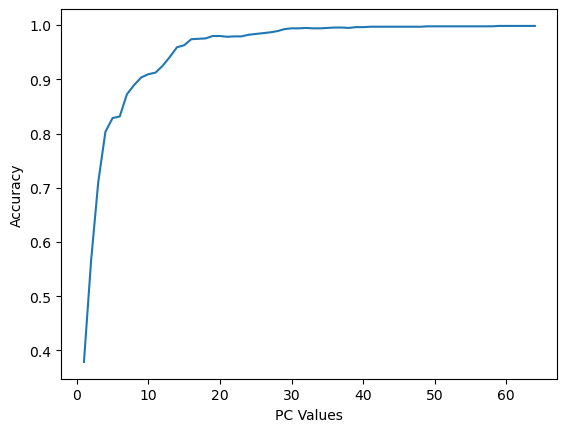

In [25]:
plt.plot(range(1,65),accuracy_list)
plt.ylabel('Accuracy')
plt.xlabel('PC Values')

In [26]:
print(accuracy_list)

[0.37861915367483295, 0.5657015590200446, 0.7104677060133631, 0.8032665181885672, 0.8285077951002228, 0.8314773570898293, 0.8723088344469191, 0.8893838158871566, 0.9034892353377877, 0.9094283593170007, 0.9123979213066072, 0.9250185597624351, 0.941351150705271, 0.9591685226429102, 0.9628804751299184, 0.9740163325909429, 0.9747587230883444, 0.9755011135857461, 0.9799554565701559, 0.9799554565701559, 0.9784706755753526, 0.9792130660727543, 0.9792130660727543, 0.9821826280623608, 0.9836674090571641, 0.9851521900519673, 0.9866369710467706, 0.9888641425389755, 0.9925760950259837, 0.994060876020787, 0.994060876020787, 0.9948032665181886, 0.994060876020787, 0.994060876020787, 0.9948032665181886, 0.9955456570155902, 0.9955456570155902, 0.9948032665181886, 0.9962880475129918, 0.9962880475129918, 0.9970304380103935, 0.9970304380103935, 0.9970304380103935, 0.9970304380103935, 0.9970304380103935, 0.9970304380103935, 0.9970304380103935, 0.9970304380103935, 0.9977728285077951, 0.9977728285077951, 0.9

In [21]:
array1=np.cumsum(pca.explained_variance_)
array1

array([ 7.4483805 , 13.33089209, 18.47647332, 22.28161205, 25.27286758,
       27.84436353, 30.27442812, 32.34318147, 34.1488204 , 35.91572629,
       37.57808343, 39.15835966, 40.526905  , 41.84811122, 43.07936456,
       44.24651027, 45.22478669, 46.18656603, 47.03135249, 47.8185708 ,
       48.53449385, 49.18373014, 49.810026  , 50.38848915, 50.95290036,
       51.48107593, 52.00112964, 52.4963671 , 52.96199383, 53.40080071,
       53.81902005, 54.21167032, 54.57936819, 54.92102809, 55.25267922,
       55.54462474, 55.81438693, 56.0737498 , 56.31901828, 56.56191825,
       56.77821315, 56.98099144, 57.17373932, 57.36163541, 57.53476746,
       57.70138771, 57.86123406, 58.00611571, 58.13787016, 58.26312418,
       58.38129779, 58.49223256, 58.59073319, 58.68639706, 58.77483593,
       58.85790299, 58.93301728, 58.99387336, 59.04383358, 59.04383358,
       59.04383358, 59.04383358, 59.04383358, 59.04383358])

In [27]:
array1=np.cumsum(pca.explained_variance_ratio_)
array1

array([0.12615002, 0.22577958, 0.31292808, 0.37737407, 0.42803568,
       0.471588  , 0.51274496, 0.54778255, 0.57836388, 0.6082892 ,
       0.63644383, 0.66320829, 0.68638675, 0.70876345, 0.72961666,
       0.7493841 , 0.76595275, 0.78224199, 0.79654978, 0.80988256,
       0.82200784, 0.83300367, 0.84361097, 0.85340816, 0.86296735,
       0.87191283, 0.88072075, 0.88910838, 0.8969945 , 0.90442638,
       0.91150958, 0.91815973, 0.92438727, 0.93017382, 0.93579085,
       0.94073541, 0.94530425, 0.94969697, 0.95385098, 0.95796487,
       0.96162816, 0.96506253, 0.96832702, 0.97150933, 0.9744416 ,
       0.97726357, 0.97997082, 0.98242462, 0.98465609, 0.98677746,
       0.98877892, 0.99065777, 0.99232603, 0.99394625, 0.9954441 ,
       0.99685097, 0.99812315, 0.99915385, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [28]:
np.where(array1 > 0.90)[0][0]

29

In [29]:
accuracy_list[29]

0.994060876020787

In [30]:
#Preprocessing
std_scaler=StandardScaler()
std_array=std_scaler.fit_transform(x_train)
x_train_std=pd.DataFrame(std_array,columns=x_train.columns)

pca=PCA(n_components=29)
x_train_pca=pca.fit_transform(x_train_std,y_train)
pc_names=[f'PC{i}' for i in range(1,x_train_pca.shape[1]+1)]
x_train_pca=pd.DataFrame(x_train_pca,columns=pc_names)
x_train_pca

lr_model=LogisticRegression()
lr_model.fit(x_train_pca,y_train)
lr_model.score(x_train_pca,y_train)

0.991833704528582

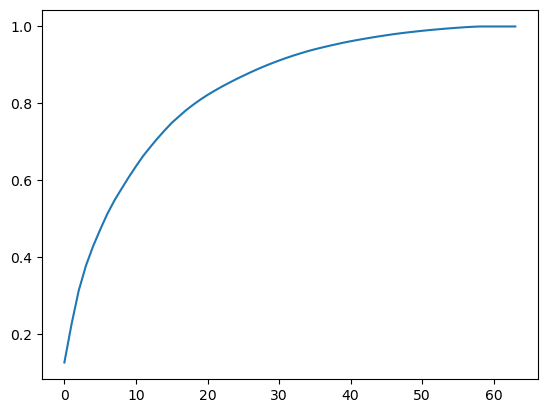

In [31]:
plt.plot(array1)

In [33]:
std_scaler=StandardScaler()
std_array=std_scaler.fit_transform(x_train)
x_train_std=pd.DataFrame(std_array,columns=x_train.columns)


pca=PCA(n_components=29)
x_train_pca=pca.fit_transform(x_train_std,y_train)
pc_names=[f'PC{i}' for i in range(1,x_train_pca.shape[1]+1)]
x_train_pca=pd.DataFrame(x_train_pca,columns=pc_names)
x_train_pca

lr_model=KNeighborsClassifier()
lr_model.fit(x_train_pca,y_train)
lr_model.score(x_train_pca,y_train)

0.9836674090571641